In [7]:
def expert_rules(input_ling_var):
    '''
    Inputs:
    input = {'Food':{'Low':[0,0,5],'Medium':[2,4,8],'High':[6,10,10]},'Service':{'Bad':[0,0,5],'Medium':[3,5,7],
    'Good':[5,10,10]},'Ambience':{'Poor':[0,2,4],'Medium':[4,6,9],'Good':[8,9,10]}}
    Outputs:
    {1: {'Food': {'High': [6, 10, 10]}, 'Service': {'Good': [5, 10, 10]}, 'Ambience': {'Good': [8, 9, 10]}}, 
    2: {'Food': {'Medium': [2, 4, 8]}, 'Service': {'Medium': [3, 5, 7]}, 'Ambience': {'Medium': [4, 6, 9]}},
    3: {'Food': {'Low': [0, 0, 5]}, 'Service': {'Bad': [0, 0, 5]}, 'Ambience': {'Poor': [0, 2, 4]}}}
    '''
    no_resturants=int(input("Enter the number of resturants:"))
    mappings={}
    for i in input_ling_var.keys():
        mappings[i]={}
        count=1
        for j in input_ling_var[i].keys():
            mappings[i][count]=j
            count+=1
    rules={}
    for i in range(no_resturants):
        rules[i+1]={}
        for j in input_ling_var.keys():
            rules[i+1][j]={}
            print(f"{mappings[j]}")
            val=int(input(f"Enter your choice for linguistic value for resturant {i+1} and linguistic variable {j}:"))
            rules[i+1][j][mappings[j][val]]=input_ling_var[j][mappings[j][val]]
    return(rules)

In [4]:
l={'Food':{'Low':[0,0,5],'Medium':[2,4,8],'High':[6,10,10]},'Service':{'Bad':[0,0,5],'Medium':[3,5,7],'Good':[5,10,10]},'Ambience':{'Poor':[0,2,4],'Medium':[4,6,9],'Good':[8,9,10]}}

In [5]:
expert_rules(l)

Enter the number of resturants:3
{1: 'Low', 2: 'Medium', 3: 'High'}
Enter your choice for linguistic value for resturant 1 and linguistic variable Food:3
{1: 'Bad', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 1 and linguistic variable Service:3
{1: 'Poor', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 1 and linguistic variable Ambience:3
{1: 'Low', 2: 'Medium', 3: 'High'}
Enter your choice for linguistic value for resturant 2 and linguistic variable Food:2
{1: 'Bad', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 2 and linguistic variable Service:2
{1: 'Poor', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 2 and linguistic variable Ambience:2
{1: 'Low', 2: 'Medium', 3: 'High'}
Enter your choice for linguistic value for resturant 3 and linguistic variable Food:1
{1: 'Bad', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 3 and linguistic

{1: {'Food': {'High': [6, 10, 10]},
  'Service': {'Good': [5, 10, 10]},
  'Ambience': {'Good': [8, 9, 10]}},
 2: {'Food': {'Medium': [2, 4, 8]},
  'Service': {'Medium': [3, 5, 7]},
  'Ambience': {'Medium': [4, 6, 9]}},
 3: {'Food': {'Low': [0, 0, 5]},
  'Service': {'Bad': [0, 0, 5]},
  'Ambience': {'Poor': [0, 2, 4]}}}

In [9]:
a={1: {'Food': {'High': [6, 10, 10]},
  'Service': {'Good': [5, 10, 10]},
  'Ambience': {'Good': [8, 9, 10]}},
 2: {'Food': {'Medium': [2, 4, 8]},
  'Service': {'Medium': [3, 5, 7]},
  'Ambience': {'Medium': [4, 6, 9]}},
 3: {'Food': {'Low': [0, 0, 5]},
  'Service': {'Bad': [0, 0, 5]},
  'Ambience': {'Poor': [0, 2, 4]}}}

In [34]:
def user_inputs(user_ling_var,input_ling_var):
    '''
    Inputs:
    user_ling_val = {'Unimportant':[0,0,5],'Important':[2,4,8],'Very Important':[6,10,10]}
    input_ling_var = {'Food':{'Low':[0,0,5],'Medium':[2,4,8],'High':[6,10,10]},'Service':{'Bad':[0,0,5],'Medium':[3,5,7],
    'Good':[5,10,10]},'Ambience':{'Poor':[0,2,4],'Medium':[4,6,9],'Good':[8,9,10]}}
    Outputs: 
    user_vocab = {'Food': {'Very Important': [6, 10, 10]}, 'Service': {'Unimportant': [0, 0, 5]}, 
    'Ambience': {'Important': [2, 4, 8]}}
    '''
    mappings={}
    count=1
    for i in user_ling_var.keys():
        mappings[count]=i
        count+=1
    print(mappings)
    user_vocab={}
    for i in input_ling_var.keys():
        user_vocab[i]={}
        val=int(input(f"Enter your choice for linguistic value for user for linguistic variable {i}:"))
        user_vocab[i][mappings[val]]=user_ling_var[mappings[val]]
    return user_vocab
        

In [11]:
m={'Unimportant':[0,0,5],'Important':[2,4,8],'Very Important':[6,10,10]}

In [12]:
b=user_inputs(m,l)

{1: 'Unimportant', 2: 'Important', 3: 'Very Important'}
Enter your choice for linguistic value for user for linguistic variable Food:3
Enter your choice for linguistic value for user for linguistic variable Service:1
Enter your choice for linguistic value for user for linguistic variable Ambience:2


In [33]:
print(b)

{'Food': {'Very Important': [6, 10, 10]}, 'Service': {'Unimportant': [0, 0, 5]}, 'Ambience': {'Important': [2, 4, 8]}}


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [28]:
def weights(rules,user_vocab):
    '''
    Inputs:
    rules = {1: {'Food': {'High': [6, 10, 10]}, 'Service': {'Good': [5, 10, 10]}, 
    'Ambience': {'Good': [8, 9, 10]}}, 2: {'Food': {'Medium': [2, 4, 8]}, 
    'Service': {'Medium': [3, 5, 7]}, 'Ambience': {'Medium': [4, 6, 9]}}, 
    3: {'Food': {'Low': [0, 0, 5]}, 'Service': {'Bad': [0, 0, 5]}, 'Ambience': {'Poor': [0, 2, 4]}}}
    user_vocab = {'Food': {'Very Important': [6, 10, 10]}, 'Service': {'Unimportant': [0, 0, 5]}, 
    'Ambience': {'Important': [2, 4, 8]}}
    Outputs:
    l = {1: {'Food': [6, 10, 10], 'Service': [5, 10, 10], 'Ambience': [8, 9, 10]}, 
    2: {'Very Important': [6, 10, 10], 'Unimportant': [0, 0, 5], 'Important': [2, 4, 8]}, 
    3: {'Food': [2, 4, 8], 'Service': [3, 5, 7], 'Ambience': [4, 6, 9]}, 
    4: {'Very Important': [6, 10, 10], 'Unimportant': [0, 0, 5], 'Important': [2, 4, 8]}, 
    5: {'Food': [0, 0, 5], 'Service': [0, 0, 5], 'Ambience': [0, 2, 4]}, 
    6: {'Very Important': [6, 10, 10], 'Unimportant': [0, 0, 5], 'Important': [2, 4, 8]}}
    '''
    l={}
    count=1
    for i in rules.keys():
        l[count]={}
        l[count+1]={}
        for j in rules[i].keys():
            for k in rules[i][j].keys():
                l[count][j]=rules[i][j][k]
            for k in user_vocab[j].keys():
                l[count+1][k]=user_vocab[j][k]
        count+=2
    #print(l)
    trimf_intervals(l)
        

In [15]:
def jaccard_coeff(recommendation_vocab,res_vocab,alpha):
    for i in range(len(recommendation_vocab)):
        for j in range(len(recommendation_vocab[i])):
            for k in range(len(recommendation_vocab[i][j])):
                recommendation_vocab[i][j][k]=list(np.around((np.arange(recommendation_vocab[i][j][k][0],recommendation_vocab[i][j][k][1]+alpha,alpha)),2))
    #print(recommendation_vocab)
    
    for i in res_vocab.keys():
        for j in range(len(res_vocab[i])):
            res_vocab[i][j]=list(np.around(np.arange(res_vocab[i][j][0],res_vocab[i][j][1]+alpha,alpha),2))
    #print(res_vocab)
                
    count=1
    z_coeff={}
    for i in res_vocab.keys():
        l1=len(recommendation_vocab[0][0])
        z_num=[0]*l1
        z_den=[0]*l1
        for j in range(len(res_vocab[i])):
            #print(res_vocab[i][j])
            for k in range(l1):
                #print(len(set(recommendation_vocab[0][j][k]).intersection(set(res_vocab[i][j]))))
                z_num[k]+=len(set(recommendation_vocab[0][j][k]) & set(res_vocab[i][j]))
                z_den[k]+=len(recommendation_vocab[0][j][k] + res_vocab[i][j])
        z_val=[]
        for i in range(len(z_num)):
            if(z_den[i]!=0):
                z_val.append(z_num[i]/z_den[i])
            else:
                z_val.append(0)
        z_coeff[count]=z_val
        count+=1
    print(z_coeff)

In [16]:
a={1: {'Food': {'High': [6, 10, 10]}, 'Service': {'Good': [5, 10, 10]}, 'Ambience': {'Good': [8, 9, 10]}}, 2: {'Food': {'Medium': [2, 4, 8]}, 'Service': {'Medium': [3, 5, 7]}, 'Ambience': {'Medium': [4, 6, 9]}}, 3: {'Food': {'Low': [0, 0, 5]}, 'Service': {'Bad': [0, 0, 5]}, 'Ambience': {'Poor': [0, 2, 4]}}}

In [17]:
b={'Food': {'Very Important': [6, 10, 10]}, 'Service': {'Unimportant': [0, 0, 5]}, 'Ambience': {'Important': [2, 4, 8]}}

In [29]:
c={'user1':{'LeastRecommended':[0,1,3],'MediumRecommended':[3,4,5],'Recommended':[5,6,7],'HighlyRecommended':[7,9,10]}}

In [30]:
d={1: [[5.92, 10.0], [6.15, 9.99], [6.38, 9.99], [6.6, 9.98], [6.81, 9.97], [7.02, 9.96], [7.23, 9.95], [7.43, 9.94], [7.63, 9.93], [7.82, 9.92], [8.02, 9.9], [8.2, 9.89], [8.39, 9.87], [8.57, 9.86], [8.74, 9.84], [8.9, 9.82], [9.06, 9.8], [9.22, 9.78], [9.38, 9.76], [9.55, 9.74], [9.71, 9.71]], 3: [[2.33, 8.57], [2.45, 8.38], [2.56, 8.2], [2.67, 8.01], [2.79, 7.82], [2.9, 7.62], [3.01, 7.43], [3.13, 7.24], [3.24, 7.04], [3.35, 6.84], [3.46, 6.64], [3.57, 6.44], [3.68, 6.24], [3.8, 6.04], [3.91, 5.83], [4.02, 5.62], [4.13, 5.42], [4.24, 5.21], [4.35, 5.0], [4.46, 4.79], [4.57, 4.57]], 5: [[0.0, 4.88], [0.01, 4.64], [0.03, 4.41], [0.04, 4.17], [0.06, 3.94], [0.08, 3.71], [0.1, 3.48], [0.12, 3.27], [0.14, 3.09], [0.17, 2.9], [0.19, 2.71], [0.22, 2.52], [0.25, 2.32], [0.29, 2.12], [0.32, 1.91], [0.36, 1.7], [0.39, 1.48], [0.44, 1.26], [0.48, 1.03], [0.52, 0.8], [0.57, 0.57]]}

In [31]:
e=[[[[0.0, 3.0], [3.0, 5.0], [5.0, 7.0], [7.0, 10.0]], [[0.05, 2.9], [3.05, 4.95], [5.05, 6.95], [7.1, 9.95]], [[0.1, 2.8], [3.1, 4.9], [5.1, 6.9], [7.2, 9.9]], [[0.15, 2.7], [3.15, 4.85], [5.15, 6.85], [7.3, 9.85]], [[0.2, 2.6], [3.2, 4.8], [5.2, 6.8], [7.4, 9.8]], [[0.25, 2.5], [3.25, 4.75], [5.25, 6.75], [7.5, 9.75]], [[0.3, 2.4], [3.3, 4.7], [5.3, 6.7], [7.6, 9.7]], [[0.35, 2.3], [3.35, 4.65], [5.35, 6.65], [7.7, 9.65]], [[0.4, 2.2], [3.4, 4.6], [5.4, 6.6], [7.8, 9.6]], [[0.45, 2.1], [3.45, 4.55], [5.45, 6.55], [7.9, 9.55]], [[0.5, 2.0], [3.5, 4.5], [5.5, 6.5], [8.0, 9.5]], [[0.55, 1.9], [3.55, 4.45], [5.55, 6.45], [8.1, 9.45]], [[0.6, 1.8], [3.6, 4.4], [5.6, 6.4], [8.2, 9.4]], [[0.65, 1.7], [3.65, 4.35], [5.65, 6.35], [8.3, 9.35]], [[0.7, 1.6], [3.7, 4.3], [5.7, 6.3], [8.4, 9.3]], [[0.75, 1.5], [3.75, 4.25], [5.75, 6.25], [8.5, 9.25]], [[0.8, 1.4], [3.8, 4.2], [5.8, 6.2], [8.6, 9.2]], [[0.85, 1.3], [3.85, 4.15], [5.85, 6.15], [8.7, 9.15]], [[0.9, 1.2], [3.9, 4.1], [5.9, 6.1], [8.8, 9.1]], [[0.95, 1.1], [3.95, 4.05], [5.95, 6.05], [8.9, 9.05]], [[1.0, 1.0], [4.0, 4.0], [6.0, 6.0], [9.0, 9.0]]]]

In [257]:
zacard_coeff(e,d,0.01)

{1: [0.0, 0.0, 0.04326923076923077, 0.3980515916575192], 2: [0.014544344995931652, 0.22241202596515203, 0.21311475409836064, 0.05258340113913751], 3: [0.3726818830242511, 0.0984920527102296, 0.0, 0.0]}


{1: {'Food': [6, 10, 10], 'Service': [5, 10, 10], 'Ambience': [8, 9, 10]}, 2: {'Very Important': [6, 10, 10], 'Unimportant': [0, 0, 5], 'Important': [2, 4, 8]}, 3: {'Food': [2, 4, 8], 'Service': [3, 5, 7], 'Ambience': [4, 6, 9]}, 4: {'Very Important': [6, 10, 10], 'Unimportant': [0, 0, 5], 'Important': [2, 4, 8]}, 5: {'Food': [0, 0, 5], 'Service': [0, 0, 5], 'Ambience': [0, 2, 4]}, 6: {'Very Important': [6, 10, 10], 'Unimportant': [0, 0, 5], 'Important': [2, 4, 8]}}


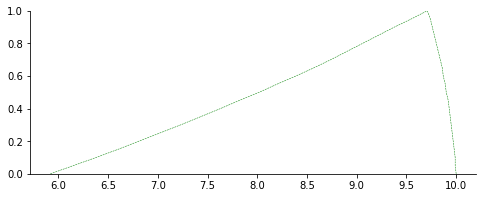

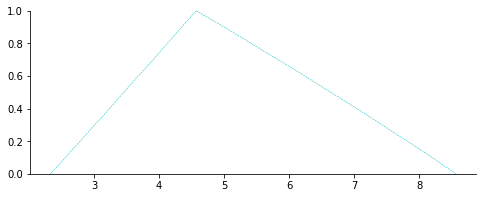

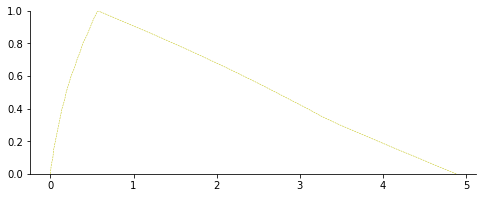

<Figure size 432x288 with 0 Axes>

In [32]:
weights(a,b)

In [35]:
def avg(x_lower,x_upper):
    '''
    Inputs: Takes the two bounds of the range
    x_lower=2
    x_upper=9
    Outputs:
    (9+2)/2'''
    return (x_lower+x_upper)/2

In [22]:
def IWA(x_in,w_in):
    '''
    Inputs:
    x_in = [[7.0, 10.0]]
    w_in = [[0.0, 4.0]]
    Outputs:
    [4,6]
    '''
    
    #calculating y min
    
    #creating a dict of lower bounds in x_in
    a={}
    for i in range(len(x_in)):
        a[i]=x_in[i][0]
    
    #sorting the dictionary a in ascending order of values
    a=sorted(a.items(),key = lambda l:(l[1], l[0])) #a is now a list with key value pair as tuples
    
    #removing the keys from a
    new_a=[]
    for i in range(len(a)):
        new_a.append(a[i][1])
        
    #arranging w_in according to the sorted 'a'
    w_min=[]
    for i in range(len(a)):
        w_min.append(w_in[a[i][0]])
    
    #calculating average of the weighted intervals 'w_min'
    wmin_avg=[]
    for i in range(len(w_min)):
        wmin_avg.append(avg(w_min[i][0],w_min[i][1]))
    
    #calcualting the starting y min
    sum_wj=sum_wi=0
    for i in range(len(new_a)):
        sum_wj+=new_a[i]*wmin_avg[i]
        sum_wi+=wmin_avg[i]
    
    ymin_approx=sum_wj/sum_wi
    
    ymin_old=ymin_approx
    
    #iterations of KM Algorithm for ymin
    L=0
    while(True):
        
        #finding L* and L*+1
        for i in range(len(new_a)-1):
            if(ymin_old>=new_a[i] and ymin_old<=new_a[i+1]):
                L=new_a[i]
                break
        
        nsum_wj=nsum_wi=0
        for i in range(len(new_a)):
            if(new_a[i]<=L):
                nsum_wj+=new_a[i]*w_min[i][1]
                nsum_wi+=w_min[i][1]
            else:
                nsum_wj+=new_a[i]*w_min[i][0]
                nsum_wi+=w_min[i][0]
        
        #finding the new y min
        ymin_new=nsum_wj/nsum_wi
        
        if(ymin_new==ymin_old):
            break
        ymin_old=ymin_new
    
    #assinging the finally obtanied ymin_old
    
    ymin=ymin_old
    
    #calculating y max
    
    #creating a dictionary of upper bounds in x_in
    
    b={}
    for i in range(len(x_in)):
        b[i]=x_in[i][1]
    
    #sorting the dictionary b in ascending order of values
    b=sorted(b.items(),key = lambda l:(l[1], l[0])) #b is now a list with key value pair as tuples
    
    #removing the keys from b
    new_b=[]
    for i in range(len(b)):
        new_b.append(b[i][1])
    
    #arranging w_in according to the sorted 'b'
    w_max=[]
    for i in range(len(b)):
        w_max.append(w_in[b[i][0]])
    
    #calcualting the starting y max
    sum_wj_max=sum_wi_max=0
    for i in range(len(new_b)):
        sum_wj_max+=new_b[i]*wmin_avg[i]
        sum_wi_max+=wmin_avg[i]
    
    ymax_approx=sum_wj_max/sum_wi_max
    
    ymax_old=ymax_approx
    #iterations of KM Algorithm for ymax
    R=0
    while(True):
        
        #finding R* and R*+1
        for i in range(len(new_b)-1):
            if(ymax_old>=new_b[i] and ymax_old<=new_b[i+1]):
                R=new_b[i]
                break
                
        nsum_wj_max=nsum_wi_max=0
        
        for i in range(len(new_b)):
            if(new_b[i]<=R):
                nsum_wj_max+=new_b[i]*w_max[i][0]
                nsum_wi_max+=w_max[i][0]
            else:
                nsum_wj_max+=new_b[i]*w_max[i][1]
                nsum_wi_max+=w_max[i][1]
        
        #finding the new ymax
        ymax_new=nsum_wj_max/nsum_wi_max

        if(ymax_new==ymax_old):
            break
        
        ymax_old=ymax_new
        
    ymax=ymax_old
    
    return([ymin,ymax])
                

In [23]:
def trimf_intervals(inputs):
    #making a list of x and y coordinates for each of the three points of the triangular function
    inputs_coord={}
    for i in inputs.keys():
        inputs_coord[i]={}
        for j in inputs[i].keys():
            inputs_coord[i][j]=[]
            for k in range(len(inputs[i][j])):
                if k%2==0:
                    inputs_coord[i][j].append((inputs[i][j][k],0))
                else:
                    inputs_coord[i][j].append((inputs[i][j][k],1))
    #print(inputs_coord)
    #calculating slope for each of the two lines of the triangular function
    slopes={}
    for i in inputs_coord.keys():
        slopes[i]={}
        for j in inputs_coord[i].keys():
            if(inputs_coord[i][j][0][0]-inputs_coord[i][j][1][0]!=0):
                s1=(inputs_coord[i][j][0][1]-inputs_coord[i][j][1][1])/(inputs_coord[i][j][0][0]-inputs_coord[i][j][1][0])
            else:
                s1=float("inf")
            if(inputs_coord[i][j][1][0]-inputs_coord[i][j][2][0]!=0):
                s2=(inputs_coord[i][j][1][1]-inputs_coord[i][j][2][1])/(inputs_coord[i][j][1][0]-inputs_coord[i][j][2][0])
            else:
                s2=float("inf")
            slopes[i][j]=[s1,s2]
    #print(slopes)
    alpha_intervals={}
    for alpha in np.arange(0,1.05,0.05):
        alpha_r=round(alpha,2)
        alpha_intervals[alpha_r]={}
        for i in inputs_coord.keys():
            alpha_intervals[alpha_r][i]={}
            for j in inputs_coord[i].keys():
                alpha_intervals[alpha_r][i][j]=[]
                for k in range(len(slopes[i][j])):
                    if slopes[i][j][k]!=float('inf'):
                        x=round(((alpha_r-inputs_coord[i][j][k][1])/slopes[i][j][k])+inputs_coord[i][j][k][0],2)
                    else:
                        x=round(inputs_coord[i][j][k][0],2)
                    alpha_intervals[alpha_r][i][j].append(x)
    #print(alpha_intervals)
    intervals={}
    for i in alpha_intervals.keys():
        for j in alpha_intervals[i].keys():
            if j not in intervals.keys():
                intervals[j]=[]
            l=[]
            for k in alpha_intervals[i][j].keys():
                l.append(alpha_intervals[i][j][k])
            intervals[j].append(l)
    #print(intervals)
    intervals_list=[]
    for i in intervals:
        intervals_list.append(intervals[i])
    #print(intervals_list)
    avg_IWA={}
    for i in range(0,len(intervals_list),2):
        avg_IWA[i+1]=[]
        for j in range(len(intervals_list[i])):
            IWA_input1=intervals_list[i][j]
            IWA_input2=intervals_list[i+1][j]
            avg_interval=IWA(IWA_input1,IWA_input2)
            avg_interval[0]=round(avg_interval[0],2)
            avg_interval[1]=round(avg_interval[1],2)
            avg_IWA[i+1].append(avg_interval)
    #print(avg_IWA)
    lower_bounds={}
    upper_bounds={}
    for i in avg_IWA.keys():
        lower_bounds[i]=[]
        upper_bounds[i]=[]
        for j in range(len(avg_IWA[i])):
            lower_bounds[i].append(avg_IWA[i][j][0])
            upper_bounds[i].append(avg_IWA[i][j][1])
    #print(lower_bounds,upper_bounds)
    
    alpha_list=[]
    for i in np.arange(0,1.05,0.05):
        alpha_list.append(round(i,2))
    #print(alpha_list)
    
    colours=['b','g','r','c','m','y','k']
    for i in avg_IWA.keys():
        fig,ax0 = plt.subplots(figsize=(8, 3))
        ax0.plot(lower_bounds[i],alpha_list, colours[i%7], linewidth=0.5, linestyle='--',label=i)
        ax0.plot(upper_bounds[i],alpha_list, colours[i%7], linewidth=0.5, linestyle='--',label=i)
        ax0.spines['top'].set_visible(False)
        ax0.spines['right'].set_visible(False)
        ax0.get_xaxis().tick_bottom()
        ax0.get_yaxis().tick_left()
        ax0.margins(y=0)
    plt.show()
    plt.tight_layout()

In [25]:
def intervals(inputs):
    #making a list of x and y coordinates for each of the three points of the triangular function
    inputs_coord={}
    for i in inputs.keys():
        inputs_coord[i]={}
        for j in inputs[i].keys():
            inputs_coord[i][j]=[]
            for k in range(len(inputs[i][j])):
                if k%2==0:
                    inputs_coord[i][j].append((inputs[i][j][k],0))
                else:
                    inputs_coord[i][j].append((inputs[i][j][k],1))
    #print(inputs_coord)
    #calculating slope for each of the two lines of the triangular function
    slopes={}
    for i in inputs_coord.keys():
        slopes[i]={}
        for j in inputs_coord[i].keys():
            if(inputs_coord[i][j][0][0]-inputs_coord[i][j][1][0]!=0):
                s1=(inputs_coord[i][j][0][1]-inputs_coord[i][j][1][1])/(inputs_coord[i][j][0][0]-inputs_coord[i][j][1][0])
            else:
                s1=float("inf")
            if(inputs_coord[i][j][1][0]-inputs_coord[i][j][2][0]!=0):
                s2=(inputs_coord[i][j][1][1]-inputs_coord[i][j][2][1])/(inputs_coord[i][j][1][0]-inputs_coord[i][j][2][0])
            else:
                s2=float("inf")
            slopes[i][j]=[s1,s2]
    #print(slopes)
    alpha_intervals={}
    for alpha in np.arange(0,1.05,0.05):
        alpha_r=round(alpha,2)
        alpha_intervals[alpha_r]={}
        for i in inputs_coord.keys():
            alpha_intervals[alpha_r][i]={}
            for j in inputs_coord[i].keys():
                alpha_intervals[alpha_r][i][j]=[]
                for k in range(len(slopes[i][j])):
                    if slopes[i][j][k]!=float('inf'):
                        x=round(((alpha_r-inputs_coord[i][j][k][1])/slopes[i][j][k])+inputs_coord[i][j][k][0],2)
                    else:
                        x=round(inputs_coord[i][j][k][0],2)
                    alpha_intervals[alpha_r][i][j].append(x)
    #print(alpha_intervals)
    intervals={}
    for i in alpha_intervals.keys():
        for j in alpha_intervals[i].keys():
            if j not in intervals.keys():
                intervals[j]=[]
            l=[]
            for k in alpha_intervals[i][j].keys():
                l.append(alpha_intervals[i][j][k])
            intervals[j].append(l)
    #print(intervals)
    intervals_list=[]
    for i in intervals:
        intervals_list.append(intervals[i])
    print(intervals_list)

In [26]:
intervals(c)

NameError: name 'c' is not defined

In [32]:
n={'temperature':{'cold':[0,0,5],'hot':[5,10,10]},'weight':{'w1':[0,0,5],'w3':[5,10,10]}}